23:52:37 - cmdstanpy - INFO - Chain [1] start processing
23:52:38 - cmdstanpy - INFO - Chain [1] done processing
23:52:38 - cmdstanpy - INFO - Chain [1] start processing


✅ Forecast complete for diesel_price — plot + CSV saved.



23:52:39 - cmdstanpy - INFO - Chain [1] done processing
23:52:39 - cmdstanpy - INFO - Chain [1] start processing


✅ Forecast complete for fertilizer_price — plot + CSV saved.



23:52:40 - cmdstanpy - INFO - Chain [1] done processing


✅ Forecast complete for seed_price — plot + CSV saved.



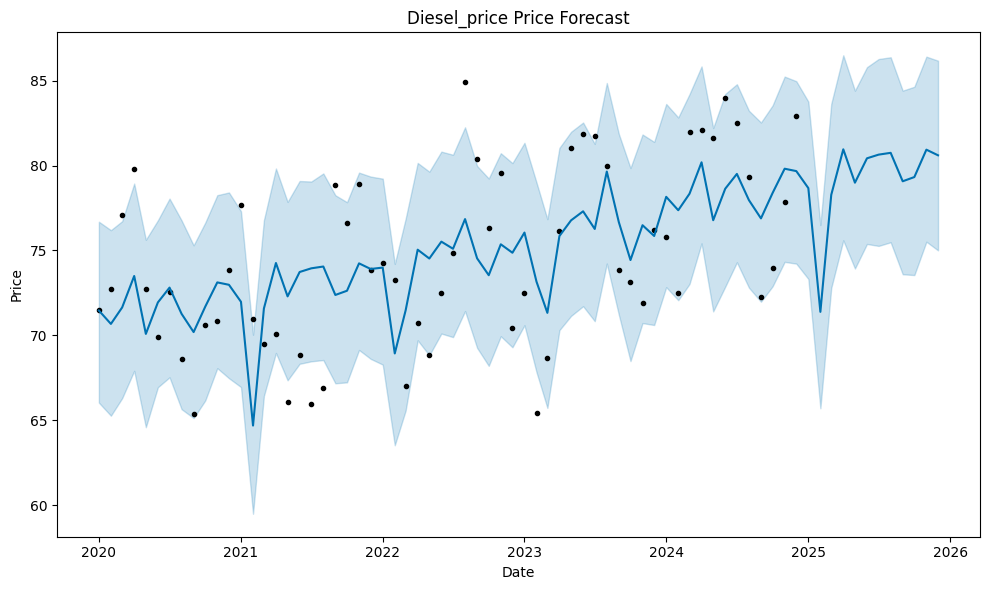

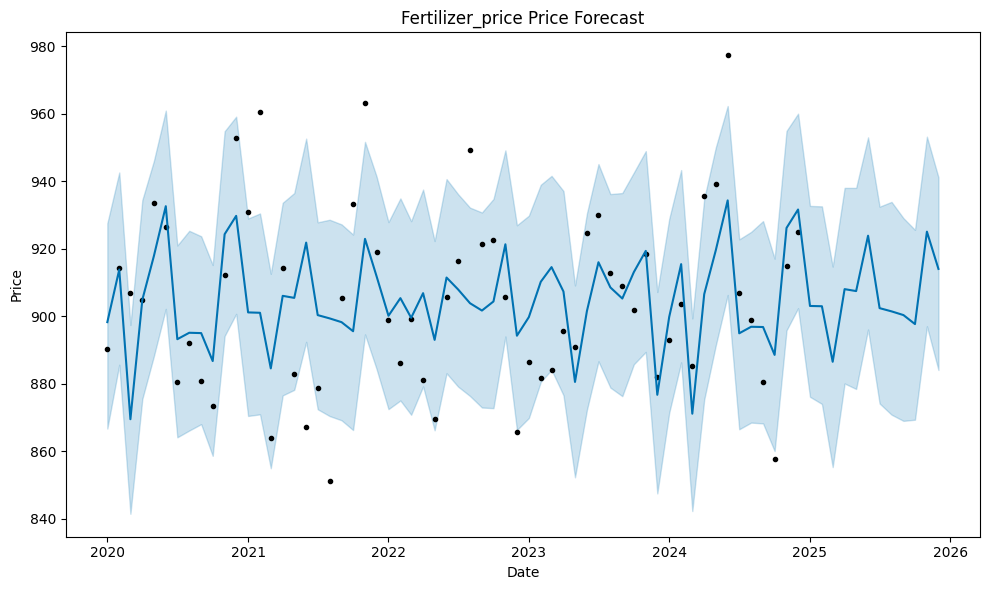

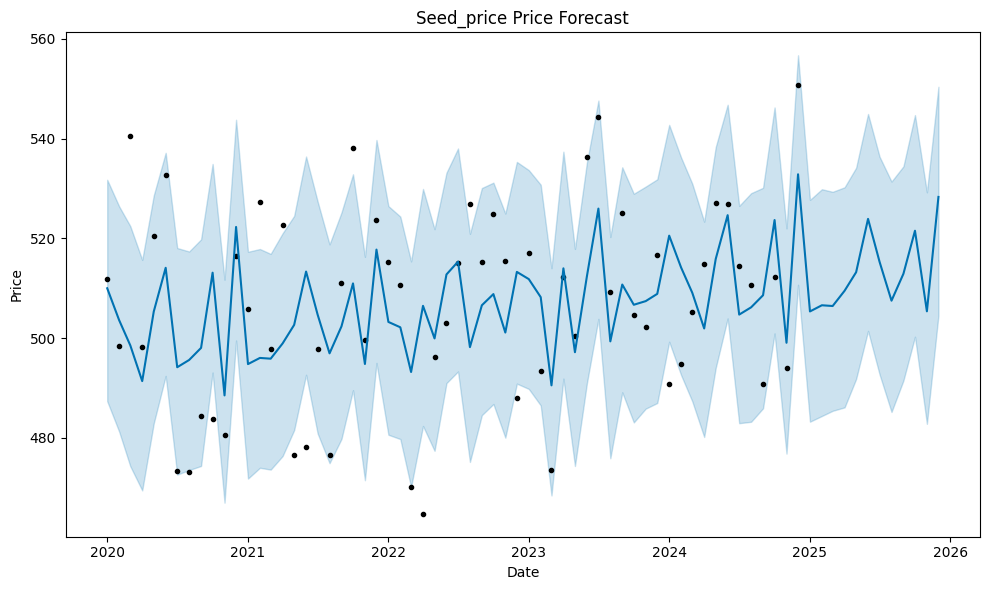

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

df = pd.read_csv("../data/cleaned/farm_input_prices_cleaned.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

def forecast_price(series, label):

    df_prophet = series.reset_index().rename(columns={"date": "ds", label: "y"})

  
    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(future)

    fig = model.plot(forecast)
    plt.title(f"{label.capitalize()} Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid()
    plt.tight_layout()

    os.makedirs("../assets", exist_ok=True)
    plt.savefig(f"../assets/forecast_{label}.png")


    forecast_out = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_out.to_csv(f"../data/cleaned/{label}_forecast.csv", index=False)

    print(f"✅ Forecast complete for {label} — plot + CSV saved.\n")


forecast_price(df['diesel_price'], 'diesel_price')
forecast_price(df['fertilizer_price'], 'fertilizer_price')
forecast_price(df['seed_price'], 'seed_price')